# World CO2 emissions Analysis
In this project I will perform the analysis of the co2 emissions around the world in different countries from 1960 onwards and then model the co2 emissions on population, GDP and income level

## Description of different variables
There are following 5 variables spread across different files:
1. Country Name: It depicts the name of the country
2. Income Level: It is a categorical variable with 4 categories as Low Income, Lower middle income, Upper middle income, High Income
3. Region: The geographical region to which the country belongs
4. GDP: The current GDP of the country
5. Population: The population of the country
6. Year: The year to which the data belongs
7. CO2: The quantity of CO2

## Installing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.plotly as py
py.sign_in('','')
import warnings
warnings.filterwarnings("ignore")

## Connecting to the data using a function
Here we define a function that will read the three files and merge them with another dataset

In [2]:
# function to load the data

def read_data(filename):
    
    df = pd.read_csv(filename,index_col=[0,1], header=2)
    cols = []

    for i in range(1960,2015):
        cols.append(str(i))

    df = df[cols[:len(cols)]]
    df = df.reset_index()

    country_metadata = pd.read_csv("Metadata_Country.csv", header=0, usecols=['Country Code','Region','IncomeGroup'])
    country_metadata = country_metadata.dropna()

    # merge the dataframe with country metadata (Data Source: WorldBank {https://data.worldbank.org})
    # to get only the countries and remove subgroups like Europe, Middle East etc

    df_merged = df.merge(country_metadata,on=['Country Code'])
    df_merged = df_merged.fillna(0)
    
    return df_merged

#### Now we connect with the three files describing CO2 emissions, GDP and population
We will now be calling the above function to read three files consisting of information about emissions, gdp and population of the countries

In [4]:
# load the data (Data Source: WorldBank {https://data.worldbank.org})

co2_emissions_total = read_data("CO2Emissions_KT.csv")
gdp_current_usd     = read_data("GDP_CurrentUSD.csv")
population          = read_data("WorldPopulation_Total.csv")
print("top rows of emissions dataset")
co2_emissions_total= co2_emissions_total.drop(['Country Code','Region','IncomeGroup'], axis=1)
co2_emissions_total.head()

top rows of emissions dataset


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,2720.914,2717.247,2823.590,2658.575,2629.239,2508.228,2500.894,1349.456,861.745,872.746
1,Afghanistan,414.371,491.378,689.396,707.731,839.743,1008.425,1092.766,1283.450,1224.778,...,1327.454,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,10014.577,9809.225
2,Angola,550.050,454.708,1180.774,1151.438,1224.778,1188.108,1554.808,993.757,1672.152,...,19156.408,22266.024,25151.953,25709.337,27792.193,29057.308,30340.758,33399.036,32617.965,34763.160
3,Albania,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,2552.232,2680.577,3072.946,...,4253.720,3898.021,3927.357,4374.731,4378.398,4598.418,5240.143,4910.113,5064.127,5716.853
4,Andorra,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,575.719,546.383,539.049,539.049,517.047,517.047,491.378,487.711,476.710,462.042


In [5]:
print("top rows of population dataset")
population=population.drop(['Country Code','Region','IncomeGroup'], axis=1)
population.head()

top rows of population dataset


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,...,100031.0,100832.0,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0
1,Afghanistan,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,...,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0
2,Angola,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,...,19552542.0,20262399.0,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0
3,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0
4,Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,78867.0,80991.0,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0


In [6]:
print("top rows of GDP dataset")
gdp_current_usd=gdp_current_usd.drop(['Country Code','Region','IncomeGroup'], axis=1)
gdp_current_usd.head()

top rows of GDP dataset


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.331006e+09,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,0.000000e+00,0.000000e+00,0.000000e+00
1,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10
2,Angola,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.823371e+10,4.178948e+10,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11
3,Albania,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.158549e+09,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10
4,Andorra,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.248215e+09,3.536633e+09,4.010991e+09,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,0.000000e+00


## Exploratory Data Analysis
In this section I would perform Exploratory Data Analysis on all the data sets one by one
We would be viewing the trend over the years and also look at top most countries in each categories

__Define a function to create overall trend__

In [7]:
def linechart(df,title_n):
    ax = df.sum().plot()
    ax.set_xlabel('Year')
    ax.set_ylabel(title_n)
    plt.show()

Calling the function on different datasets

#### The trend population over the years
We call the above function to describe the overall global population across the years

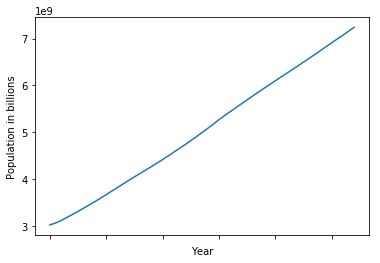

In [8]:
population_country = population
population_country = population_country.set_index(['Country Name'])
linechart(population_country,"Population in billions")

We oberve that the growth of population over the years have been smooth and same

#### The Trend of GDP over the years
Now we call above function to observe the trend of global gdp over the years

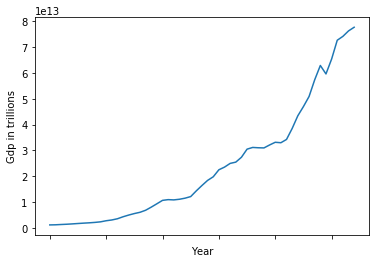

In [9]:
gdp_country = gdp_current_usd
gdp_country = gdp_country.set_index(['Country Name'])
linechart(gdp_country,"Gdp in trillions")

We oberve that over the last two decades there has been very high rate of increase in GDP

#### The Trend of co2 emissons over the years

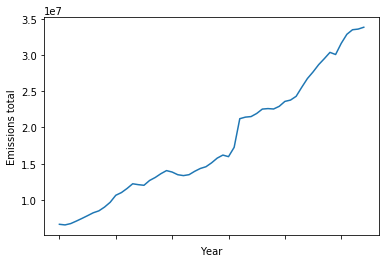

In [10]:
co2 = co2_emissions_total
co2 = co2.set_index(['Country Name'])
linechart(co2,"Emissions total")

There has been continous increase in the emissions over the years

##### Now we define a function to obtain the top countries
This function will take as arguments the data, the year and the number of values to return from function call

In [11]:
# for a given year, determine the top CO2 emitters 

def top_countries(dfnnn,year, top=5):
    df = dfnnn[year]
    df_sorted = df.sort_values(ascending=False)
    df_sorted = df_sorted.reset_index().head(top)
    df_sorted.index = df_sorted.index+1
    
    return df_sorted.round(2)

##### define function to plot subplots of the top countries
This function plots the individual trends for the biggest contributing countries

In [12]:
co2_emissions_total.columns
def subplots(topdf,ndfn,title_n):
    
    plt.figure(figsize=(10, 20))

    for i in range(len(topdf)):
        plt.subplot(len(topdf),2,i+1)
        ax =ndfn.loc[topdf.loc[i,'Country Name']].plot()
        ax.set_xlabel("year")
        ax.set_ylabel(title_n)
        plt.title(topdf.loc[i,'Country Name'])

    try:
        plt.tight_layout()
        plt.show()
    except exception as e:
        print("try once")

##### Have a look at the population trend for top countries

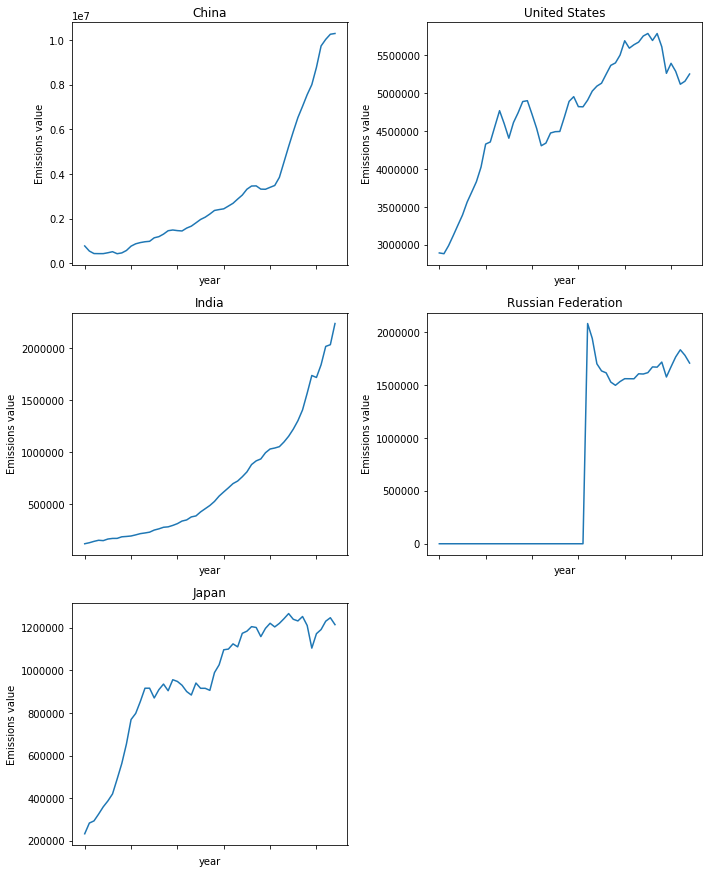

In [13]:
subplots(top_countries(co2,'2014',5).reset_index(drop=True),co2,"Emissions value")

We observe that China, USA, India, Russia and Japan are the biggest contributors to emissions over the world

##### Understand the population trend for top countries

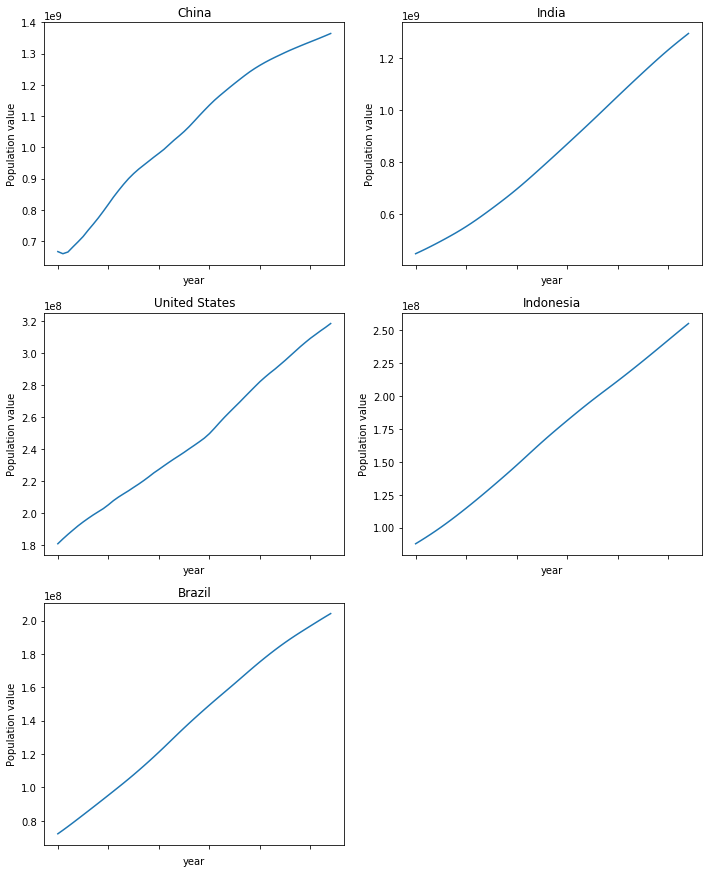

In [14]:
subplots(top_countries(population_country,'2014',5).reset_index(drop=True),population_country,"Population value")

We can clearly see that population growth has been continous and China and INDIA are the countries with highest population

#### Understand the trend for top countries gdp

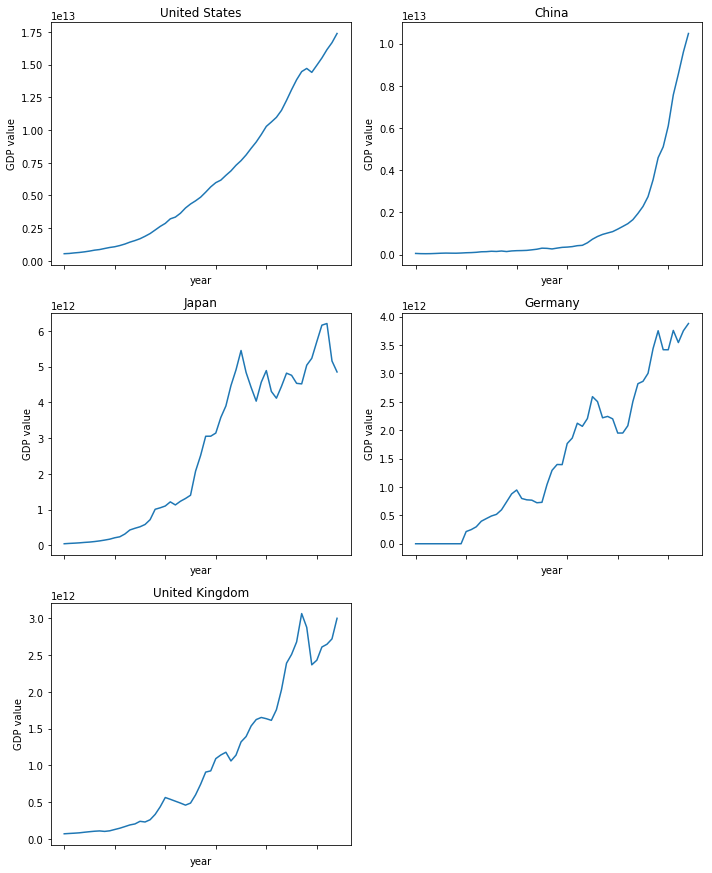

In [15]:
subplots(top_countries(gdp_country,'2014',5).reset_index(drop=True),gdp_country,"GDP value")

## I define the overlaying plots to understand the differences and similarities between top nations

In [16]:
# function to draw multi-line plots for most populated contries 1960-2014

def multilineplot(topdf,main,title_n):
    
    # define the figure size
    plt.figure(figsize=(15, 10))
    
    # loop through dataframe to make plots overlying
    try:
        for i in range(len(topdf)):
            main.loc[topdf.loc[i,'Country Name']].plot()
    except exception as e:
        print("Try properly")
    # add legends,axis labels and title
    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel(title_n)
    plt.title('Comparative Chart of top five countries ')
    
    plt.show()

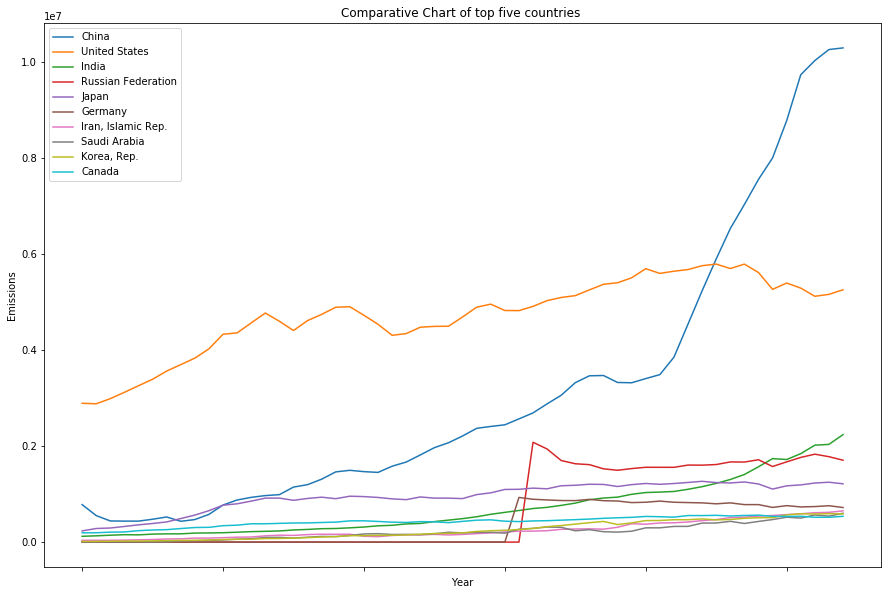

In [19]:
multilineplot(top_countries(co2,'2014',10).reset_index(drop=True),co2,"Emissions")

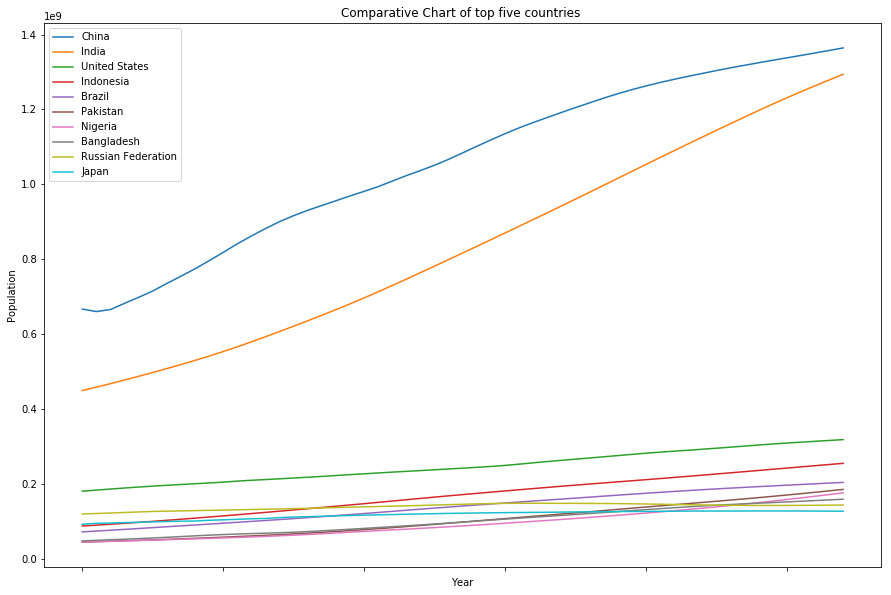

In [20]:
multilineplot(top_countries(population_country,'2014',10).reset_index(drop=True),population_country,"Population")

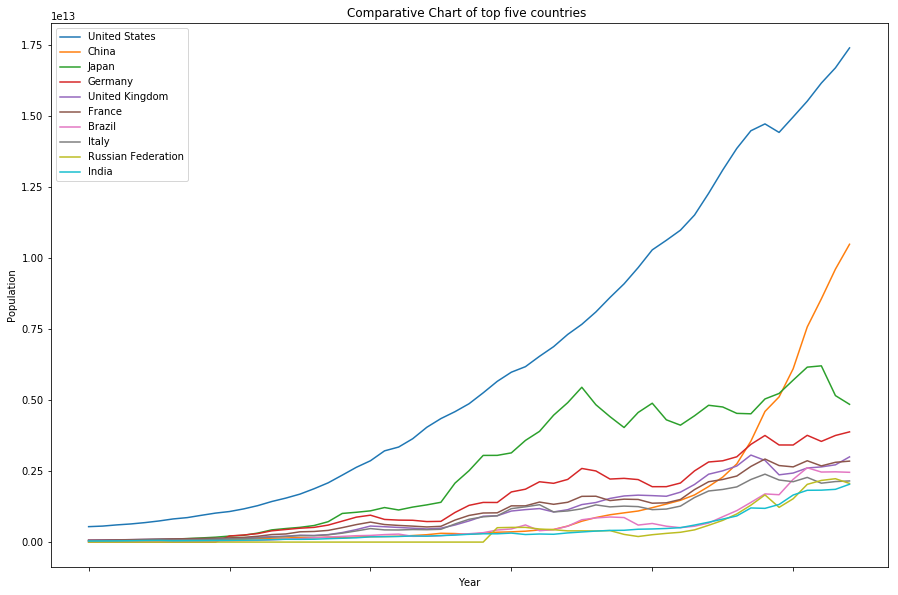

In [21]:
multilineplot(top_countries(gdp_country,'2014',10).reset_index(drop=True),gdp_country,"Population")

# Machine Learning
I try to predict the value of CO2 emissions based on other variables

In [22]:
# melt the dataframes so that the data can be subsequently merged

co2_emissions_total = read_data("CO2Emissions_KT.csv")
gdp_current_usd     = read_data("GDP_CurrentUSD.csv")
population          = read_data("WorldPopulation_Total.csv")
co2_emissions_total_melt = pd.melt(co2_emissions_total,id_vars=['Country Name','Country Code','Region','IncomeGroup'],
                                   var_name='year',value_name='co2_emissions')

gdp_current_usd_melt = pd.melt(gdp_current_usd,id_vars=['Country Code'],
                               var_name='year',value_name='gdp_current_usd')

population_melt = pd.melt(population,id_vars=['Country Code'],
                          var_name='year',value_name='population')

In [23]:
co2_gdp_population_data =  co2_emissions_total_melt.merge(gdp_current_usd_melt, 
                                on=['Country Code','year']).merge(population_melt,
                                on=['Country Code','year'])

In [24]:
# check the merged dataframe

co2_gdp_population_data.head()

,Country Name,Country Code,Region,IncomeGroup,year,co2_emissions,gdp_current_usd,population
0,Aruba,ABW,Latin America & Caribbean,High income,1960,0.000,0,54211
1,Afghanistan,AFG,South Asia,Low income,1960,414.371,5.37778e+08,8.99635e+06
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,550.050,0,5.64318e+06
3,Albania,ALB,Europe & Central Asia,Upper middle income,1960,2024.184,0,1.6088e+06
4,Andorra,AND,Europe & Central Asia,High income,1960,0.000,0,13411


In [25]:
# remove the rows with zero values

co2_gdp_population_data = co2_gdp_population_data[(co2_gdp_population_data != 0).all(1)]

# check the information about the dataframe

co2_gdp_population_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8354 entries, 1 to 11934
Data columns (total 8 columns):
Country Name       8354 non-null object
Country Code       8354 non-null object
Region             8354 non-null object
IncomeGroup        8354 non-null object
year               8354 non-null object
co2_emissions      8354 non-null float64
gdp_current_usd    8354 non-null object
population         8354 non-null object
dtypes: float64(1), object(7)
memory usage: 587.4+ KB


## Saving the data

In [26]:
co2_gdp_population_data.to_excel("co2_gdp_population_datanew.xlsx",index=False)

# check first few rows of the dataframe

co2_gdp_population_data.head(1)

,Country Name,Country Code,Region,IncomeGroup,year,co2_emissions,gdp_current_usd,population
1,Afghanistan,AFG,South Asia,Low income,1960,414.371,5.37778e+08,8.99635e+06


## Data preparation

In [27]:
## Divide the data between train and test

# convert year to numeric 

co2_gdp_population_data['year'] = co2_gdp_population_data['year'].astype('int')

# drop unnecessary columns from the dataframe

df = co2_gdp_population_data.drop(['Country Name','Country Code','Region','IncomeGroup'], axis=1)

# using year as filter define train data as data before 2011 and assign rest as test data 

train = df[co2_gdp_population_data['year']<=2011]
test = df[co2_gdp_population_data['year']>2011]

# save the predictor variables and remove unnecessary columns

train_x = train.drop(['year','co2_emissions'],axis=1)
test_x = test.drop(['year','co2_emissions'],axis=1)

# save the response variable 

train_y = train['co2_emissions']
test_y = test['co2_emissions']

#### Linear Regression

In [28]:
## Apply multiple linear regression

# Save linear regression function

regr = linear_model.LinearRegression()

# train the model using the training sets

regr.fit(train_x, train_y)

# make predictions using the testing set

y_pred = regr.predict(test_x)

# print the coefficients

print('Coefficients: \n', regr.coef_)

# print explained variance score: 1 is perfect prediction

print('Linear Regression Test Data R-2 score: %.2f' % r2_score(test_y, y_pred))

Coefficients: 
 [4.49175431e-07 1.79507337e-03]
Linear Regression Test Data R-2 score: 0.78


#### Random Forest

In [29]:
# apply random forest regression on training set (ensemble of decision trees)

rf = RandomForestRegressor(n_estimators=1100, oob_score=True, random_state=0)
rf.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1100, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [30]:
## Predictions
## Making Predictions

# make predictions on test dataset 

predicted_test = rf.predict(test_x)

# calculate mean squared error, spearman and pearson correlation on test set

test_score = r2_score(test_y, predicted_test)

# print the results

print(f'Random Forest Test data R-2 score: {test_score:>5.3}')

Random Forest Test data R-2 score: 0.876


In [31]:
## Export the test data
# Append the predicted values by random forest regressor for co2 emissions as a column in the test data

test['predicted_co2_emmissions'] = predicted_test

# check first few rows of dataframe
co2_gdp_population_data['year'] = co2_gdp_population_data['year'].astype('int')
dd = co2_gdp_population_data[co2_gdp_population_data['year']>2011]
test['Country Name'] = dd['Country Name']
test.head(10)

,year,co2_emissions,gdp_current_usd,population,predicted_co2_emmissions,Country Name
11285,2012,10755.311,2.05365e+10,3.0697e+07,34699.390870,Afghanistan
11286,2012,33399.036,1.15398e+11,2.50962e+07,164721.816683,Angola
11287,2012,4910.113,1.23198e+10,2.9004e+06,6820.029946,Albania
11288,2012,487.711,3.14615e+09,82431,532.288385,Andorra
11289,2012,176386.367,3.74818e+11,8.90045e+06,56675.191822,United Arab Emirates
11290,2012,192356.152,5.45982e+11,4.20967e+07,289933.451857,Argentina
11291,2012,5694.851,1.06193e+10,2.88192e+06,6151.882545,Armenia
11293,2012,524.381,1.21605e+09,96777,522.614173,Antigua and Barbuda
11294,2012,388126.281,1.53819e+12,2.27283e+07,400160.571594,Australia
11295,2012,62272.994,4.07452e+11,8.42999e+06,62350.337697,Austria


Case Study has been complete